In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px

In [ ]:
week = pd.read_csv('week22_28.csv').drop("Unnamed: 0",axis=1)

In [ ]:
df = pd.read_csv("output.csv").drop("Unnamed: 0",axis=1)
df

,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,Continent
0,China,503302,0,5272,0.0,379053,0,118977,7557,347,4,160000000,110461,1448471400,Asia
1,USA,105148929,24941,1144242,249.0,102473264,58247,1531423,2436,314060,3418,1163631220,3475546,334805269,North America
2,India,44685450,193,530763,1.0,44152687,127,2000,0,31768,377,918101478,652695,1406631776,Asia
3,France,39600548,4584,164829,38.0,39368047,3989,67672,869,603809,2513,271490188,4139547,65584518,Europe
4,Germany,38068912,25038,167604,113.0,37630800,13600,270508,0,453830,1998,122332384,1458359,83883596,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Diamond Princess,712,0,13,0.0,699,0,0,0,0,0,0,0,0,Do not know
227,Vatican City,29,0,0,0.0,29,0,0,0,36295,0,0,0,799,Europe
228,Western Sahara,10,0,1,0.0,9,0,0,0,16,2,0,0,626161,Africa
229,MS Zaandam,9,0,2,0.0,7,0,0,0,0,0,0,0,0,Do not know


In [ ]:
df.describe()

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
count,2.310000e+02,231.000000,2.310000e+02,231.000000,2.310000e+02,231.000000,2.310000e+02,231.000000,231.000000,231.000000,2.310000e+02,2.310000e+02,2.310000e+02
mean,2.940300e+06,660.532468,2.941577e+04,4.813853,2.739997e+06,995.536797,8.192995e+04,74.939394,193797.220779,1201.614719,3.002951e+07,1.958991e+06,3.439366e+07
std,9.548907e+06,3146.549252,1.047373e+05,28.686233,9.193313e+06,5825.961726,7.606388e+05,528.920168,196700.415335,1275.299928,1.136584e+08,3.528050e+06,1.380709e+08
min,5.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,-7.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.412300e+04,0.000000,1.795000e+02,0.000000,1.208250e+04,0.000000,2.100000e+01,0.000000,16545.500000,133.500000,2.260585e+05,8.447800e+04,4.281115e+05
50%,2.066330e+05,0.000000,1.965000e+03,0.000000,1.316340e+05,0.000000,6.730000e+02,1.000000,123588.000000,754.000000,1.677538e+06,7.173800e+05,5.554960e+06
75%,1.299745e+06,22.500000,1.398400e+04,0.000000,1.255746e+06,7.500000,9.061000e+03,17.500000,313297.000000,1961.000000,1.148478e+07,2.120314e+06,2.183934e+07
max,1.051489e+08,25038.000000,1.144242e+06,312.000000,1.024733e+08,58247.000000,1.139420e+07,7557.000000,703959.000000,6512.000000,1.163631e+09,2.330212e+07,1.448471e+09


In [ ]:
df.dtypes

Country, Other        object
Total Cases            int64
New Cases              int64
Total Deaths           int64
New Deaths           float64
Total Recovered        int64
New Recovered          int64
Active Cases           int64
Serious, Critical      int64
Tot Cases/ 1M pop      int64
Deaths/ 1M pop         int64
Total Tests            int64
Tests/ 1M pop          int64
Population             int64
Continent             object
dtype: object

In [ ]:
def IQR(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    return col[(col >= q1 - 1.5*iqr) & (col <= q3 + 1.5*iqr)]

# DataRelationship

In [ ]:
cor_matrix=df.corr()
cor_matrix

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
Total Cases,1.000000,0.747878,0.879717,0.743286,0.990137,0.741832,0.327502,0.244702,0.163847,0.221202,0.841121,0.065813,0.375731
New Cases,0.747878,1.000000,0.565109,0.684516,0.732756,0.679838,0.479177,0.163903,0.178433,0.136808,0.460422,0.047664,0.134230
Total Deaths,0.879717,0.565109,1.000000,0.783414,0.885004,0.791217,0.145845,0.226078,0.025080,0.289186,0.795439,0.010114,0.413453
New Deaths,0.743286,0.684516,0.783414,1.000000,0.736343,0.905630,0.343232,0.172222,0.071573,0.185083,0.439455,-0.015982,0.172322
Total Recovered,0.990137,0.732756,0.885004,0.736343,1.000000,0.753794,0.256817,0.247018,0.166821,0.225634,0.844311,0.070569,0.376675
New Recovered,0.741832,0.679838,0.791217,0.905630,0.753794,1.000000,0.113357,0.188981,0.117145,0.192232,0.506406,0.043791,0.161254
Active Cases,0.327502,0.479177,0.145845,0.343232,0.256817,0.113357,1.000000,0.070723,0.035108,-0.001689,0.137036,-0.021244,0.075374
"Serious, Critical",0.244702,0.163903,0.226078,0.172222,0.247018,0.188981,0.070723,1.000000,-0.032585,0.015547,0.295103,-0.021689,0.682436
Tot Cases/ 1M pop,0.163847,0.178433,0.025080,0.071573,0.166821,0.117145,0.035108,-0.032585,1.000000,0.450666,0.096495,0.537210,-0.137757
Deaths/ 1M pop,0.221202,0.136808,0.289186,0.185083,0.225634,0.192232,-0.001689,0.015547,0.450666,1.000000,0.175040,0.249828,-0.067940


Correlation is a measure of the linear relationship between two variables. It ranges from -1 to 1, with -1 indicating a perfect negative correlation (when one variable goes up, the other goes down), 1 indicating a perfect positive correlation (when one variable goes up, the other goes up), and 0 indicating no correlation between the variables.

Now we come to find the data relationship by visualized for each column

## 1. Total Cases

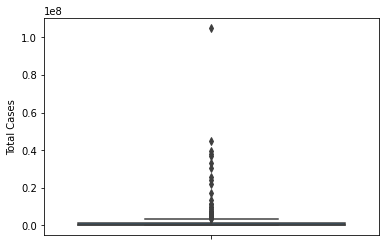

In [ ]:
sns.boxplot( y=df["Total Cases"] );
plt.show()


We can observe that the difference between the country with the highest total number of cases and almost all other countries is quite significant. Therefore, we will create a boxplot that excludes the country with the extreme number of cases to visualize the distribution of the remaining countries in the list.

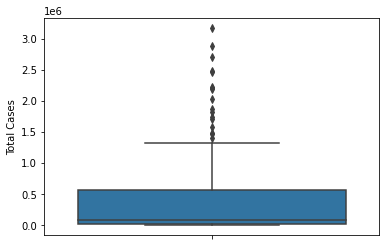

In [ ]:
q1 = df['Total Cases'].quantile(0.25)
q3 = df['Total Cases'].quantile(0.75)
iqr = q3 - q1
totalCase = df["Total Cases"][(df['Total Cases'] >= q1 - 1.5*iqr) & (df['Total Cases'] <= q3 + 1.5*iqr)]
sns.boxplot( y= totalCase);
plt.show()

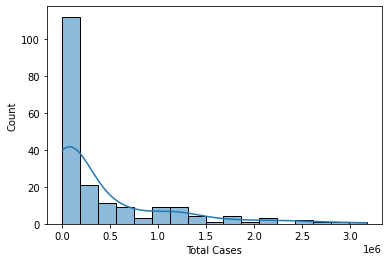

In [ ]:
sns.histplot(data=totalCase, kde=True);

Almost all of the total cases are distributed between 10,000 and 3,000,000 cases. The distribution is left-skewed.

## 2. New Cases

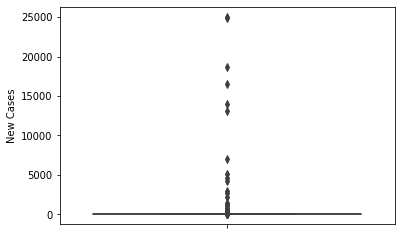

In [ ]:
sns.boxplot( y=df["New Cases"] );
plt.show()

After observing a considerable difference in new cases between the maximum and minimum values, we will re-plot the data to visualize the distribution without the extreme values.

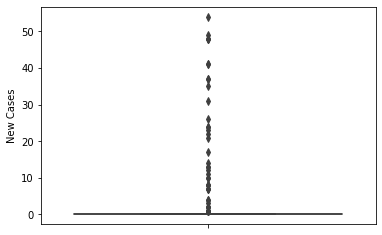

In [ ]:
q1 = df['New Cases'].quantile(0.25)
q3 = df['New Cases'].quantile(0.75)
iqr = q3 - q1
newCase = df["New Cases"][(df['New Cases'] >= q1 - 1.5*iqr) & (df['New Cases'] <= q3 + 1.5*iqr)]
sns.boxplot( y= newCase);
plt.show()

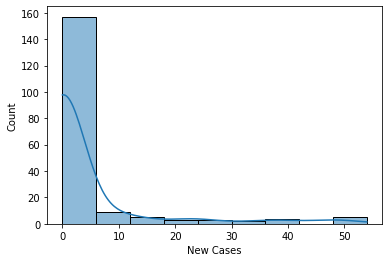

In [ ]:
sns.histplot(data=newCase, kde=True);

In [ ]:
import plotly.graph_objects as go
new_case_week = week.groupby('day').sum()['New Cases']
fig = go.Figure()
fig.add_trace(go.Scatter(x=new_case_week.index, y=new_case_week.values,
                    mode='lines',
                    name='lines'))
fig.update_layout(title='New COVID-19 Cases Per Week')

## 3. Total Deaths 

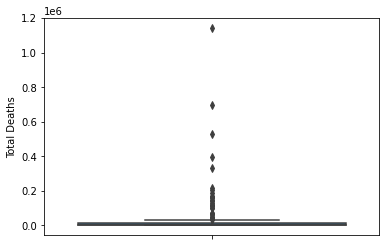

In [ ]:
sns.boxplot( y=df["Total Deaths"] );
plt.show()

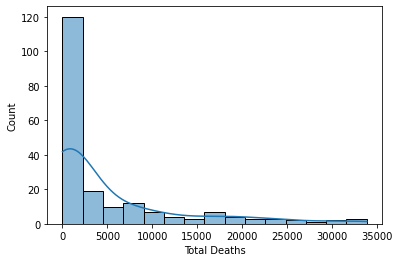

In [ ]:
sns.histplot(data=IQR(df["Total Deaths"]), kde=True);

## 4. New Deaths

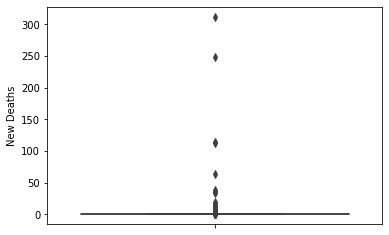

In [ ]:
sns.boxplot( y=df["New Deaths"] );
plt.show()

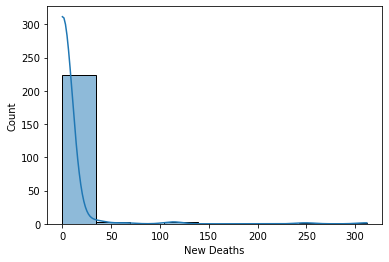

In [ ]:
sns.histplot(data=df["New Deaths"], kde=True);

In [ ]:
new_deaths_week = week.groupby('day').sum()['New Deaths']
fig = go.Figure()
fig.add_trace(go.Scatter(x=new_deaths_week.index, y=new_deaths_week.values,
                    mode='lines',
                    name='lines'))
fig.update_layout(title='New COVID-19 Deaths Per Week')

## 5. Total Recovered

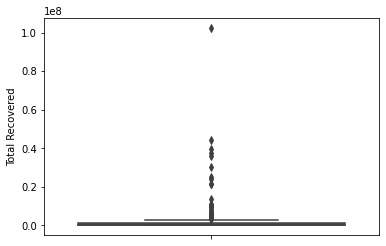

In [ ]:
sns.boxplot( y=df["Total Recovered"] );
plt.show()

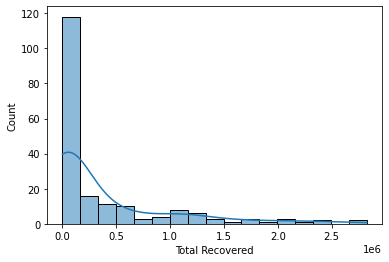

In [ ]:
sns.histplot(data=IQR(df["Total Recovered"]), kde=True);

It is apparent that the majority of the nation's fatalities fall within the 1000 to 35,000 range.

## 6. New Recovered

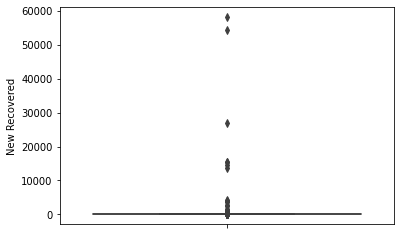

In [ ]:
sns.boxplot( y=df["New Recovered"] );
plt.show()

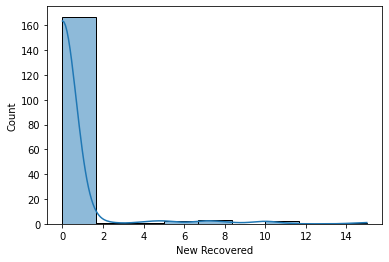

In [ ]:
sns.histplot(data=IQR(df["New Recovered"]), kde=True);

It is apparent that the majority of the nation's fatalities fall within the 1000 to 35,000 range.

In [75]:
new_recovered_week = week.groupby('day')['New Recovered'].sum()
fig = go.Figure()
fig.add_trace(go.Scatter(x=new_recovered_week.index, y=new_recovered_week.values,
                    mode='lines',
                    name='lines'))
fig.update_layout(title='New COVID-19 Recovered Per Week')

## 7. Active cases

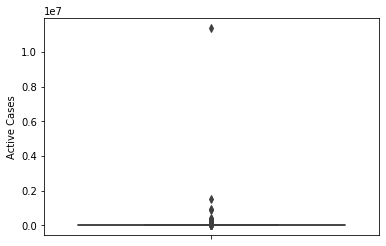

In [ ]:
sns.boxplot( y=df["Active Cases"] );
plt.show()

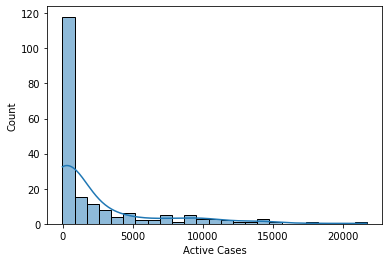

In [ ]:
sns.histplot(data=IQR(df["Active Cases"]), kde=True);

## 8. Serious, Critical

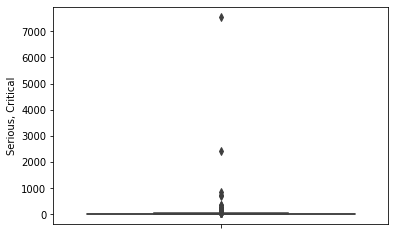

In [ ]:
sns.boxplot( y=df["Serious, Critical"] );
plt.show()

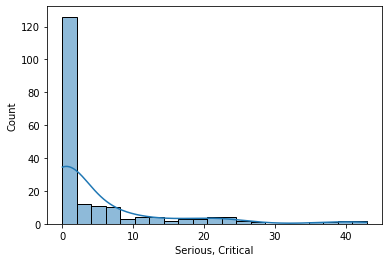

In [ ]:
sns.histplot(data=IQR(df["Serious, Critical"]), kde=True);

## 9. Tot Cases/ 1M pop

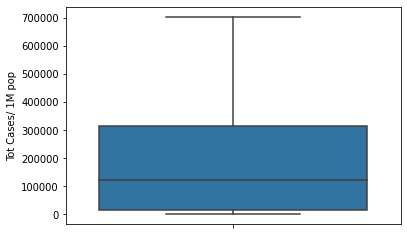

In [ ]:
sns.boxplot( y=df["Tot Cases/ 1M pop"] );
plt.show()

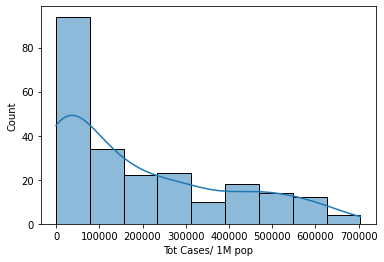

In [ ]:
sns.histplot(data=IQR(df["Tot Cases/ 1M pop"]), kde=True);

## 10. Deaths/ 1M pop

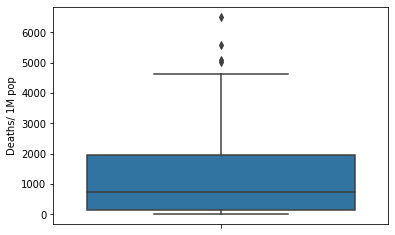

In [ ]:
sns.boxplot( y=df["Deaths/ 1M pop"] );
plt.show()

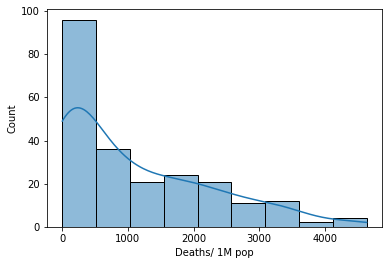

In [ ]:
sns.histplot(data=IQR(df["Deaths/ 1M pop"]), kde=True);

## 11. Total Tests

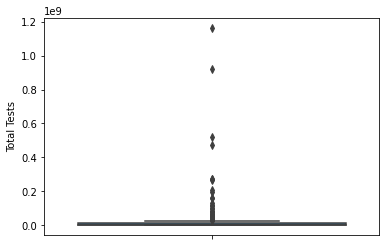

In [ ]:
sns.boxplot( y=df["Total Tests"] );
plt.show()

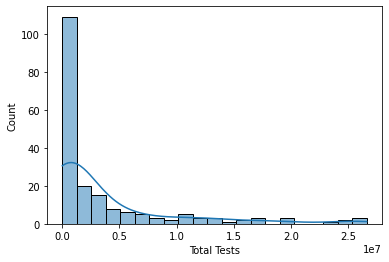

In [ ]:
sns.histplot(data=IQR(df["Total Tests"]), kde=True);

## 12.Tests/ 1M pop

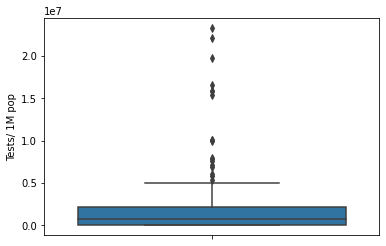

In [ ]:
sns.boxplot( y=df["Tests/ 1M pop"] );
plt.show()

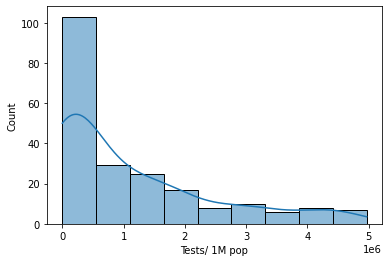

In [ ]:
sns.histplot(data=IQR(df["Tests/ 1M pop"]), kde=True);

## 13. Population

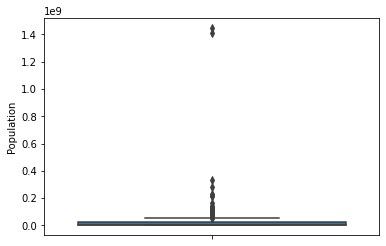

In [ ]:
sns.boxplot( y=df["Population"] );
plt.show()

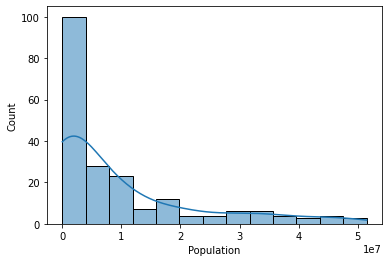

In [ ]:
sns.histplot(data=IQR(df["Population"]), kde=True);

## 14. Continent

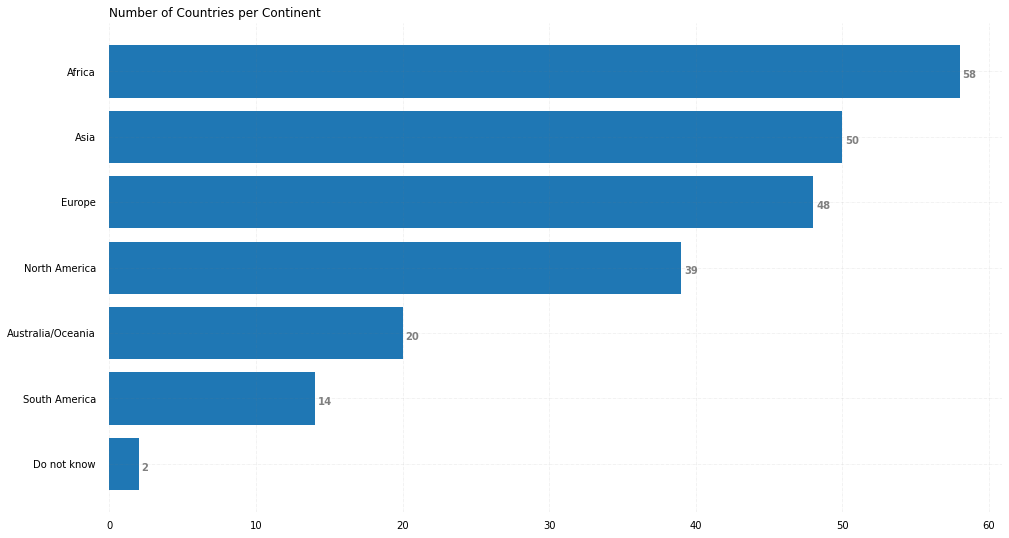

In [ ]:
continent = df['Continent'].value_counts()
continent.values
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(continent.index, continent.values)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Number of Countries per Continent',
             loc ='left', )
 
 
# Show Plot
plt.show()

## New Cases vs New Deaths vs New Recovered

In [ ]:
import plotly.express as px
fig = px.scatter(df, x="New Cases", y="New Deaths",size='New Recovered', trendline='ols', trendline_color_override='#DEB887')
fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=new_case_week.index, y=new_case_week.values,
                    mode='lines',
                    name='Case'))
fig.add_trace(go.Scatter(x=new_deaths_week.index, y=new_deaths_week.values,
                    mode='lines',
                    name='Deaths'))
fig.add_trace(go.Scatter(x=new_recovered_week.index, y=new_recovered_week.values,
                    mode='lines',
                    name='Recovered'))

fig.show()

## Relation between Total and new: Total Cases vs New Cases, Total Deaths vs New Deaths, Total Recovered vs  New Recovered

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define colors for each pie chart
cases_colors = ['gold', 'mediumturquoise']
deaths_colors = ['blue', 'red']
recovered_colors = ['darkorange', 'lightgreen']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],  
                    subplot_titles=("Total Cases", "Total Deaths",'Total Recovered'))

# Add traces for each pie chart with the corresponding labels, values, and colors
fig.add_trace(go.Pie(labels=['New Cases','Remain'], 
                     values=[sum(df["New Cases"]),sum(df["Total Cases"]) - sum(df["New Cases"])], 
                     name="Total Cases", marker=dict(colors=cases_colors)), 1, 1)

fig.add_trace(go.Pie(labels=["New Deaths",'Remain'], 
                     values=[sum(df["New Deaths"]),sum(df["Total Deaths"]) - sum(df["New Deaths"])], 
                     name="Total Deaths", marker=dict(colors=deaths_colors)), 1, 2)

fig.add_trace(go.Pie(labels=["New Recovered",'Remain'], 
                     values=[sum(df["New Recovered"]),sum(df["Total Recovered"]) - sum(df["New Recovered"])], 
                     name="Total Recovered", marker=dict(colors=recovered_colors)), 1, 3)

fig.show()


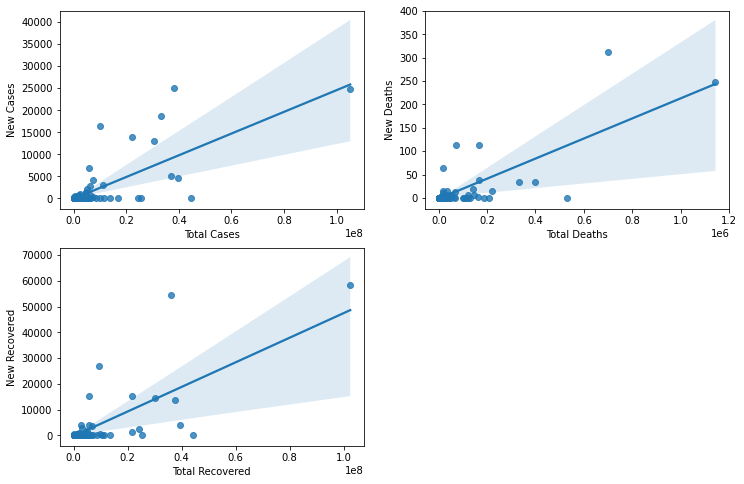

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.regplot(x="Total Cases", y="New Cases", data=df, ax=axes[0,0]);
sns.regplot(x="Total Deaths", y="New Deaths", data=df, ax=axes[0,1]);
sns.regplot(x="Total Recovered", y="New Recovered", data=df, ax=axes[1,0]);
axes[1,1].remove();
plt.show()

While this is not true in every case, we can observe that there is a positive linear correlation between the total number of cases and the number of new cases, particularly when the total number of cases is high. The same pattern holds for the number of deaths and the number of recovered cases.

## 15. Relation between Total Deaths, Total Recovered, Active Cases

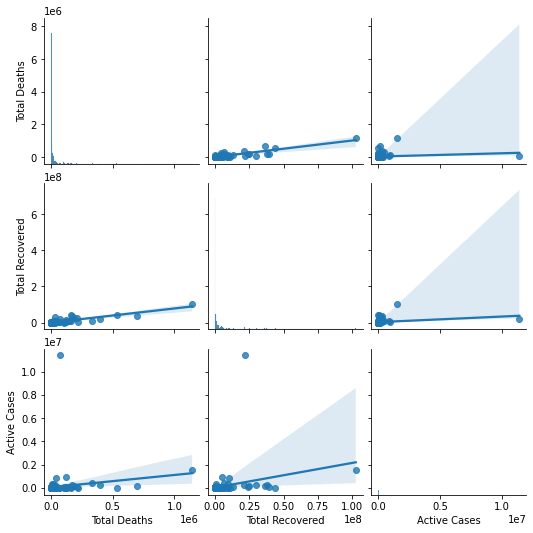

In [ ]:
sns.pairplot(df[['Total Deaths', 'Total Recovered', 'Active Cases']], kind="reg")
plt.show();

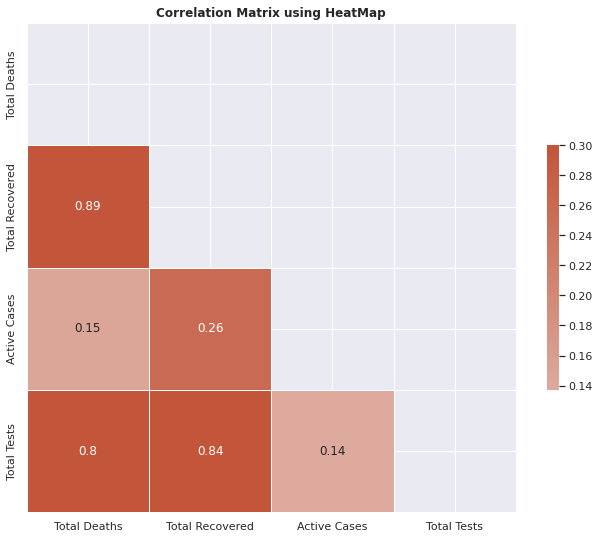

In [76]:
mask = np.triu(np.ones_like(df[['Total Deaths', 'Total Recovered', 'Active Cases','Total Tests']].corr(), dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df[['Total Deaths', 'Total Recovered', 'Active Cases','Total Tests']].corr(),annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix using HeatMap",fontweight="bold")
plt.show()

In [ ]:
import plotly.graph_objects as go
labels = ['Total Deaths', 'Total Recovered', 'Active Cases']
sizes = [sum(df['Total Deaths']), sum(df['Total Recovered']), sum(df['Active Cases'])]  
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes,sort=False)])
fig.update_traces(marker=dict(colors=['#ff4d6d','#70e000','#0096c7']))
fig.show()

In [ ]:
toptencases = df[df['Country, Other']!='Turkey'].sort_values(by=['Total Cases'], ascending=False)[:15]
toptencases

,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,Continent
1,USA,105148929,24941,1144242,249.0,102473264,58247,1531423,2436,314060,3418,1163631220,3475546,334805269,North America
2,India,44685450,193,530763,1.0,44152687,127,2000,0,31768,377,918101478,652695,1406631776,Asia
3,France,39600548,4584,164829,38.0,39368047,3989,67672,869,603809,2513,271490188,4139547,65584518,Europe
4,Germany,38068912,25038,167604,113.0,37630800,13600,270508,0,453830,1998,122332384,1458359,83883596,Europe
5,Brazil,36997328,5174,698381,312.0,36170812,54404,128135,0,171798,3243,63776166,296146,215353593,South America
6,Japan,33136016,18654,71923,114.0,21669889,1261,11394204,212,263854,573,94608068,753340,125584838,Asia
7,S. Korea,30458857,13082,33887,14.0,30209520,14496,215450,186,593394,660,15804065,307892,51329899,Asia
8,Italy,25547414,0,187850,0.0,25174036,0,185528,154,423934,3117,267156892,4433200,60262770,Europe
9,UK,24341615,0,206246,0.0,24071436,2621,63933,0,355363,3011,522526476,7628357,68497907,Europe
10,Russia,22203942,13954,395901,34.0,21542609,15408,265432,0,152284,2715,273400000,1875095,145805947,Europe


*Why using stacked bar char:* We're interested in seeing which countries have the most cases overall as well as what proportion the total deaths, total recoveries, and active cases make up. The y-axis displays the numeric categories, while the x-axis displays the list of countries in the Country and Other columns. Hence, stacked bar charts are a suitable chart for this use.

<ipython-input-48-1f38dd8fc46b>:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-48-1f38dd8fc46b>:11: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




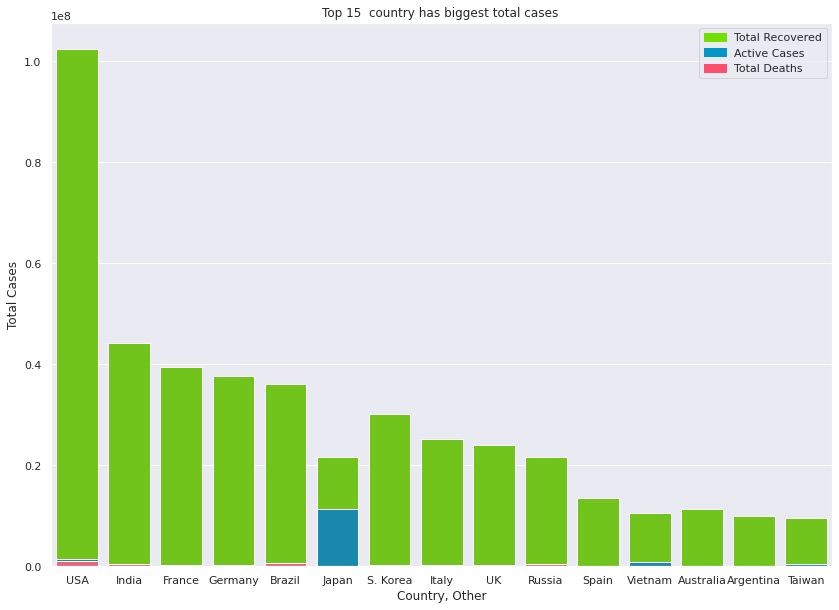

In [ ]:
import matplotlib.patches as mpatches
# set plot style: grey grid in the background:
sns.set(style="darkgrid")
# set the figure size
plt.figure(figsize=(14, 10))

bar1 = sns.barplot(x="Country, Other",  y="Total Recovered", data=toptencases, color='#70e000');

bar2 = sns.barplot(x="Country, Other", y="Active Cases", data=toptencases, estimator=sum, ci=None,  color='#0096c7');

bar3 = sns.barplot(x="Country, Other", y="Total Deaths", data=toptencases, estimator=sum, ci=None,  color='#ff4d6d');
# add legend
top_bar = mpatches.Patch(color='#70e000', label='Total Recovered')
bottom_bar = mpatches.Patch(color='#0096c7', label='Active Cases')
mid_bar = mpatches.Patch(color='#ff4d6d', label='Total Deaths')
plt.legend(handles=[top_bar, bottom_bar,mid_bar])
plt.ylabel('Total Cases')
plt.title('Top 15  country has biggest total cases ')
# show the graph
plt.show();

*Explain:* About all of the time, the percentage of recovered cases in all cases is the highest. With the exception of Japan, where there are many active cases, there are few active cases overall and few deaths overall.

## Population vs Continent

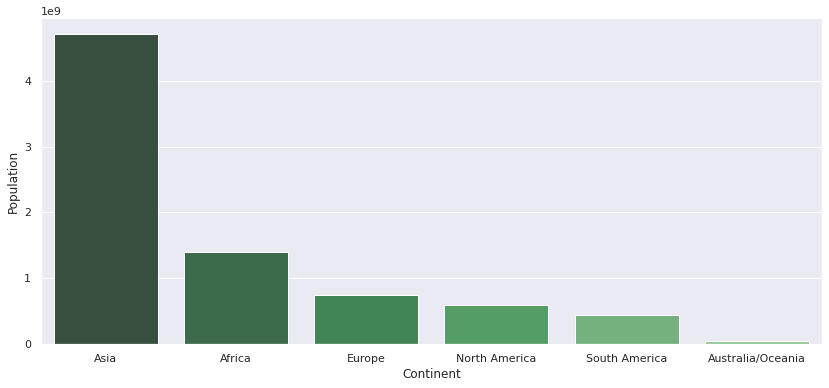

In [ ]:
data = df[df.Continent != 'Do not know'].groupby('Continent').sum()
sumofPopulation = data.Population.sort_values(ascending=False)
rank = sumofPopulation.argsort().argsort()
pal = sns.color_palette("Greens_d", len(data))
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(x=sumofPopulation.index, y=sumofPopulation, palette=np.array(pal)[rank]);

### Total Cases vs Continent

In [ ]:
df['Continent'].value_counts()

Africa               58
Asia                 50
Europe               48
North America        39
Australia/Oceania    20
South America        14
Do not know           2
Name: Continent, dtype: int64

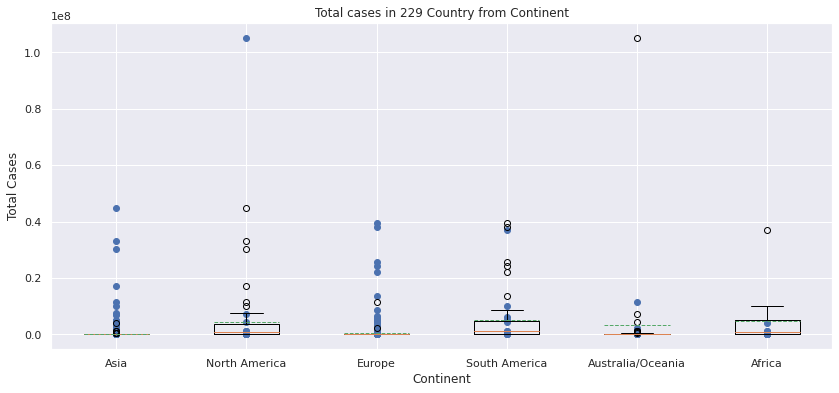

In [ ]:
con = df[df.Continent != 'Do not know']
fig, ax = plt.subplots(figsize=(14, 6))
grouped_data = con.groupby('Continent')['Total Cases'].apply(list)
ax.boxplot(grouped_data, positions=range(0, len(con['Continent'].unique())), showmeans=True, meanline=True)
plt.scatter(con['Continent'], con['Total Cases'])
plt.title('Total cases in 229 Country from Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')

ax.set_xticks(range(len(con['Continent'].unique())))
ax.set_xticklabels(con['Continent'].unique());

We check the total cases on different continents using Analysis of variance (ANOVA). In order to answer the research question (“is the total cases in country different in continent?”) we now need to formulate it properly as a null hypothesis with a corresponding alternate hypothesis:

> H0: true mean total cases are the same for all continent <br>
 H1: true mean total cases are not the same for all continent

In [ ]:
continent = df['Continent'].value_counts().index.to_list()
continent.remove('Do not know')
continents = []
for c in continent:
    continents.append(df[df['Continent']==c]['Total Cases'].to_list())
continent_groups = {}
for continent, group in con.groupby('Continent'):
    continent_groups[continent] = group['Total Cases']
n_total = sum([len(x) for x in continent_groups.values()])
total_mean = sum(df['Total Cases']) / n_total
continent_means = {continent: sum(values) / len(values) for continent, values in continent_groups.items()}

Finding a mean

In [ ]:
mean = con['Total Cases'].mean()
mean

2965976.406113537

Finding total sum of squares

In [ ]:
sst = 0
for cont in range(len(continents)):
    for change in range(len(continents[cont])):
        sst+=((continents[cont][change] - mean)**2)
        
print(sst)

2.0954334674440988e+16


Finding degrees of freedom number 1

In [ ]:
df_1 = len(continents) - 1
df_1

5

Calculating variations within groups 

In [ ]:
def ssw(data):
    meann = sum(data) / len(data)
    ssw = 0
    for i in range(len(data)):
        ssw += (data[i]-meann)**2
    return meann, ssw
ssw_cont = [ssw(x) for x in continents]

Calculating a sum of variations within groups

In [ ]:
ssw_full = sum([x[1] for x in ssw_cont])
ssw_full

2.005235191025025e+16

Degrees of freedom number 2

In [ ]:
df_2 = n_total - len(continent_groups)
df_2

223

In [ ]:
continent_means = {continent: sum(values) / len(values) for continent, values in continent_groups.items()}
ssb  = sum([len(values) * (mean - total_mean)**2 for continent, values in continent_groups.items() for mean in [continent_means[continent]]])

Calculating F-score

In [ ]:
F = ssb/df_1/(ssw_full/df_2)
F 

2.0061702219799953

With Critical F-value:	2.25453784 (Degrees of freedom 1 = 5, Degrees of freedom 2 = 223, Probability level = 0.05). When the F statistic is less than the F critical value, it means that there is not enough evidence to reject the null hypothesis that the group means are equal. This indicates that there is not a statistically significant difference between the means of the groups being compared.


## Total Deaths vs Population

Due to the presence of extreme values in the data, Spearman Correlation can be used instead of Correlation Coefficient to determine the correlation between Total Deaths and Population.

Spearman’s correlation coefficient is a statistical measure of the strength of a monotonic relationship between paired data. In a sample it is denoted by and is by $r_s$ design constrained as follows: 
$$-1 \leq r_s \leq 1$$

And its interpretation is similar to that of Pearsons, e.g. the closer 
is to the 
stronger the monotonic relationship. Correlation is an effect size and so we can 
verbally describe the strength of the correlation using the following guide for the 
absolute value of 
:
* .00-.19 “very weak”
* .20-.39 “weak”
* .40-.59 “moderate”
* .60-.79 “strong”
* .80-1.0 “very strong”


In [72]:
def spearman_corr(x, y):
    n = len(x)
    print(n)
    rank_x = {val: i+1 for i, val in enumerate(sorted(set(x)))}
    rank_y = {val: i+1 for i, val in enumerate(sorted(set(y)))}
    rank_x_values = [rank_x[val] for val in x]
    rank_y_values = [rank_y[val] for val in y]
    rank_diff_sq = sum([(rank_x_values[i] - rank_y_values[i]) ** 2 for i in range(n)])
    print(rank_diff_sq)
    return 1 - (6 * rank_diff_sq / (n * (n**2 - 1)))


In [73]:
print(spearman_corr(df['Total Deaths'], df['Population']))

231
482469
0.7651487567904359


Since $r_s = 0.76514$ We can infer a strong correlation between Total Deaths and Population.

*Why using jointplot:* Population and Total Deaths are numeric type. We want to view relationship between population and total deaths and distribution of them. A Jointplot comprises three plots. Out of the three, one plot displays a bivariate graph which shows how the dependent variable(Total Deaths) varies with the independent variable(Population). Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the independent variable(Population). The third plot is placed on the right margin of the bivariate graph with the orientation set to vertical and it shows the distribution of the dependent variable(Total Deaths).

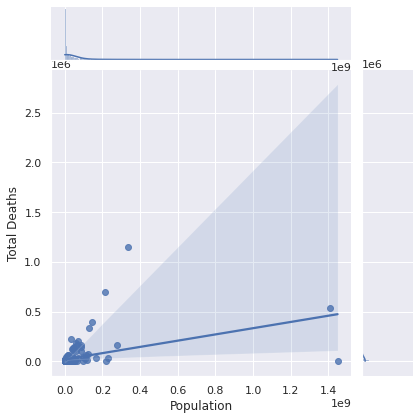

In [ ]:
g = sns.jointplot(x="Population", y="Total Deaths", data=df,kind='reg')
plt.show();

*Explain*: According to the graph, population has a moderate impact on the overall death rate. The nation's large population makes the overall death toll significant. The overall number of deaths and the total population may change significantly between nations depending on how the data is distributed.

In [ ]:
continents = df[df.Continent != 'Do not know'].groupby('Continent').sum()
continents['Continent'] = continents.index 
fig = px.bar(continents, x="Continent",y = ['Total Recovered','Total Deaths','Active Cases'], title="Compare Recovered, Deaths and Active case between Continent")
fig.show()

### Total Tests, Totals Cases, New Cases, Active Cases

In [ ]:
import plotly.express as px
fig = px.scatter(df[df.Continent != 'Do not know'], x="Total Tests", y="Total Cases",size='Population', trendline='ols', trendline_color_override='#DEB887')
fig.show()

In [ ]:
fig = px.scatter(df[df.Continent != 'Do not know'], x="Total Tests", y="Total Deaths",size='Population', trendline='ols', trendline_color_override='#DEB887')
fig.show()

In [ ]:
fig = px.scatter_3d(df, x="Total Tests", y="Total Deaths", z='Total Cases', color = 'Continent')
fig.show()

In [ ]:
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 106.9 MB/s eta 0:00:00


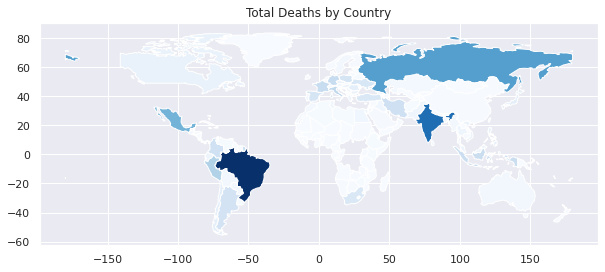

In [77]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the built-in dataset for countries
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Merge the dataframe with the Total values based on the 'name' column
merged_data = world_map.merge(df,left_on='name',right_on='Country, Other')
fig, ax = plt.subplots(figsize=(10, 6))
merged_data.plot(column='Total Deaths', cmap='Blues', ax=ax)
ax.set_title('Total Deaths by Country')
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd


# Load the country code data from plotly
country_codes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

# Merge the country code data with the sample dataframe
merged_df = pd.merge(df, country_codes, left_on='Country, Other', right_on='COUNTRY')

# Create a choropleth map using plotly
fig = px.choropleth(merged_df, locations='CODE', color='Total Cases', hover_name='COUNTRY', projection='robinson')

# Show the map
fig.show()